## 一、环境配置

In [52]:
# 导入所有使用到的模块，并设定matplotlib的绘图基础格式
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 8),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签 plt.rcParam
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['savefig.dpi'] = 300 #图片像素
#plt.rcParams['figure.dpi'] = 300 #分辨率

# 色卡，从左往右
zhong_gray = '#8C8EA1' #RGB=140，142，161 
qian_gray = '#959EC3' #RGB=149，158，195 
dan_gray ='#D9DBF5' #RGB=217，219，245 
qian_blue = '#3B4F88' #RGB=59，79，136 
shen_black = '#0A0D1E' #RGB=10，13，30 
shen_gray = '#786B7A' #RGB=120，107，122 

## 二、将历年高校毕业生人数作图

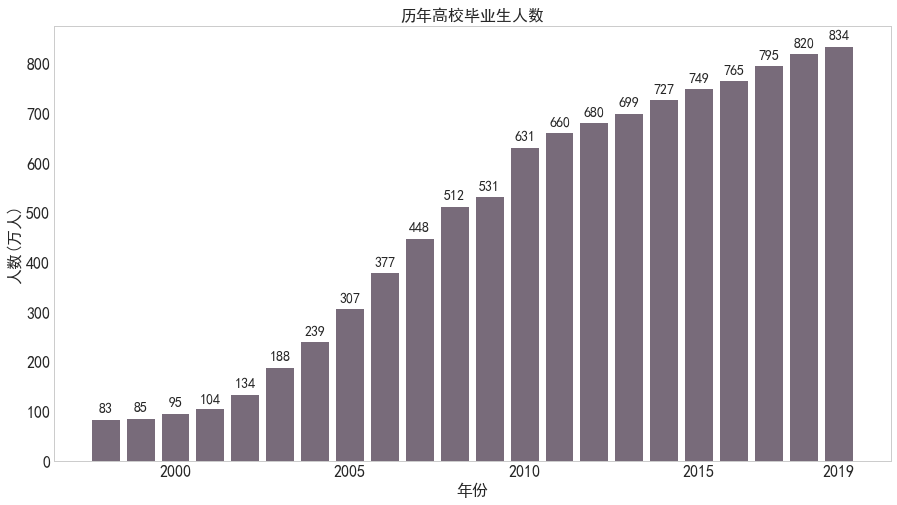

In [54]:
### 大学生历年毕业人数
dfdd = pd.read_excel(r'E:\文档\桌面\历年高校毕业人数.xlsx')
x = dfdd.年份
y = dfdd.人数
plt.bar(x = x ,height = y,align='center',color=shen_gray)
plt.xticks([2000,2005,2010,2015,2019])
plt.title('历年高校毕业生人数')
plt.xlabel('年份')
plt.ylabel('人数(万人)')
for a,b in zip(x,y):
    plt.text(a, b+10, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.grid()
plt.show()
import  warnings
warnings.filterwarnings("ignore", module="plt") #忽略警告信息 

## 三、导入数据

In [1]:
path = 'E:\\data\\商品标题含有毕业二字的销售数据'
files = os.listdir(path)
df = pd.DataFrame()
for file in files:
    dfs = pd.read_csv(path+'\\'+file,low_memory=False)
    dfs.drop(axis=1,columns=['Unnamed: 0','Unnamed: 0.1'],inplace=True)
    dfs['date'] = file[:4]
    df = pd.concat([df,dfs],axis=0)
#更改列顺序
ls = list(df.columns)
ls.remove('date')
ls.insert(0,'date')
df = df.reindex(columns=ls)
df.reset_index(drop=True,inplace=True)
# 清除price中出现的两个异常文本值，
df.drop(labels=[415053,528859],inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,date,loc,title,brand_id,cat_id,item_id,price,sold,store,sales,cat
0,1801,上海,上海市初中毕业生统一学业考试解读 物理修订版上海教育出版社,NaN,50002834.0,1.859530e+10,12,3.0,大智丰图书专营店,36.0,"[书籍/杂志/报纸, 考试/教材/论文, 中学教辅]"
1,1801,广东 东莞,毕业庆典徽章马口铁胸章个性DIY胸牌会议表彰勋章公司LOGO员工牌,NaN,254107.0,3.575463e+10,2.5,2.0,环保手挽袋,5.0,"[个性定制/设计服务/DIY, 办公/文具定制, 个性徽章]"
2,1801,浙江 杭州,飞碟说动画制作MG扁平设计flash毕业相册工业生产作业流程成毕设,NaN,50014935.0,3.776247e+10,10,5.0,第一动漫毕业设计,50.0,"[个性定制/设计服务/DIY, 设计服务, FLASH/动画制作]"
3,1801,浙江金华,龙奇水晶纪念品 定制同学聚会纪念品 实用相框 定做毕业礼品摆件,20000:3278940,50020835.0,3.894341e+10,40,8.0,龙奇旗舰店,320.0,"[家居饰品, 摆件]"
4,1801,浙江 金华,泰迪熊叮当猫小丸子花束卡通花束礼盒生日毕业圣诞节元旦礼盒包邮,NaN,121402029.0,3.976313e+10,29,86.0,恋花坊1314,2494.0,"[鲜花速递/花卉仿真/绿植园艺, 卡通花（新）, 卡通花]"


### 3.1 各字段含义

In [55]:
#各字段的含义
dfw = pd.DataFrame(df.columns.T,columns=['列名'])
dfw['含义'] = ['日期','索引','商品标题','品牌id','类目id','商品id','价格','销售数量','店铺','销售额','类目名']
dfw

,列名,含义
0,date,日期
1,loc,索引
2,title,商品标题
3,brand_id,品牌id
4,cat_id,类目id
5,item_id,商品id
6,price,价格
7,sold,销售数量
8,store,店铺
9,sales,销售额


### 3.2 各字段数据类型修改

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224073 entries, 0 to 1224072
Data columns (total 11 columns):
date        1224073 non-null object
loc         1219543 non-null object
title       1224073 non-null object
brand_id    335379 non-null object
cat_id      1197241 non-null float64
item_id     1224071 non-null float64
price       1224071 non-null object
sold        1224071 non-null float64
store       1224071 non-null object
sales       1224071 non-null float64
cat         1197241 non-null object
dtypes: float64(4), object(7)
memory usage: 102.7+ MB


**针对以上字段实际含义，brand_id，cat_id，item_id应当是object类型，price都需要修改修改为float类型，所以，进行修改**

In [60]:
# 更改dtype类型
df.price = df.price.astype('float')
df.cat_id = df.cat_id.astype('object')
df.item_id = df.item_id.astype('object')

In [61]:
print(df.shape)
df.info()

(1224073, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224073 entries, 0 to 1224072
Data columns (total 11 columns):
date        1224073 non-null object
loc         1219543 non-null object
title       1224073 non-null object
brand_id    335379 non-null object
cat_id      1197241 non-null object
item_id     1224071 non-null object
price       1224071 non-null float64
sold        1224071 non-null float64
store       1224071 non-null object
sales       1224071 non-null float64
cat         1197241 non-null object
dtypes: float64(3), object(8)
memory usage: 102.7+ MB


**一共又1224073行，11列，brand_id及后续字段都存在缺失值**

## 四、清洗数据

In [62]:
#查看数据特征
pd.set_option('display.float_format', lambda x: '%.3f' % x) #更改float显示方式为3位小数
df.describe() #对数据进行基础的描述

,price,sold,sales
count,1224071.000,1224071.000,1224071.000
mean,53.736,230.771,3001.145
std,214.756,7806.097,37331.447
min,0.001,1.000,0.008
25%,10.100,1.000,30.000
50%,25.000,3.000,100.000
75%,51.000,15.000,487.552
max,19999.000,2653585.000,19758024.000


In [63]:
df.groupby(by=df.date).sum().iloc[:12].sales.sum() #2018年全年销售额

2206839476.7517095

### 4.1 去除重复值

In [64]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.shape

(1224073, 11)

可以看出，并没有变化，所以，是没有重复值的

### 4.2 处理异常值

In [65]:
#由于需要按找类目进行处理，所以这里需要先将类目进行拆分，拆分为一级类目以及最小类目
df['一级类目'] = df['cat'].str[1:-1].str.split(',').str[0] 
df['最小类目'] = df['cat'].str[1:-1].str.split(',').str[-1]
df.head(2)

,date,loc,title,brand_id,cat_id,item_id,price,sold,store,sales,cat,一级类目,最小类目
0,1801,上海,上海市初中毕业生统一学业考试解读 物理修订版上海教育出版社,NaN,50002834.000,18595297839.000,12.000,3.000,大智丰图书专营店,36.000,"[书籍/杂志/报纸, 考试/教材/论文, 中学教辅]",书籍/杂志/报纸,中学教辅
1,1801,广东 东莞,毕业庆典徽章马口铁胸章个性DIY胸牌会议表彰勋章公司LOGO员工牌,NaN,254107.000,35754631442.000,2.500,2.000,环保手挽袋,5.000,"[个性定制/设计服务/DIY, 办公/文具定制, 个性徽章]",个性定制/设计服务/DIY,个性徽章


In [66]:
df.price.describe()

count   1224071.000
mean         53.736
std         214.756
min           0.001
25%          10.100
50%          25.000
75%          51.000
max       19999.000
Name: price, dtype: float64

In [68]:
# 筛选相关类目数据
df.最小类目.fillna('无',inplace=True)
df1 = df[df.最小类目.str.contains('个性徽章')]
df1.price.describe()

count   3086.000
mean      10.089
std       27.735
min        0.100
25%        1.000
50%        3.000
75%        8.000
max      800.000
Name: price, dtype: float64

In [9]:
#按照箱型图方法去除异常值
df222 = df1[df1.price <= 10+3*27]

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.figure()
p = pd.DataFrame(df222.price).boxplot()
plt.show()

<Figure size 640x480 with 1 Axes>

### 4.3 处理缺失值

In [70]:
df.shape

(1224073, 13)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1224073 entries, 0 to 1224072
Data columns (total 13 columns):
date        1224073 non-null object
loc         1219543 non-null object
title       1224073 non-null object
brand_id    335379 non-null object
cat_id      1197241 non-null object
item_id     1224071 non-null object
price       1224071 non-null float64
sold        1224071 non-null float64
store       1224071 non-null object
sales       1224071 non-null float64
cat         1197241 non-null object
一级类目        1197241 non-null object
最小类目        1224073 non-null object
dtypes: float64(3), object(10)
memory usage: 130.7+ MB


**查看日期都有那些值**

In [72]:
df.date.unique()

array(['1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809', '1810', '1811', '1812', '1901', '1902', '1903', '1904',
       '1905'], dtype=object)

**找到价格的缺失值**

In [246]:
df[df.price.isnull()]

,date,loc,title,brand_id,cat_id,item_id,price,sold,store,sales,cat,一级类目,最小类目


In [73]:
#删除price中的空值
df.dropna(inplace=True,subset=['price'])
df.shape

(1224071, 13)

In [75]:
df.count()

date        1224071
loc         1219541
title       1224071
brand_id     335379
cat_id      1197241
item_id     1224071
price       1224071
sold        1224071
store       1224071
sales       1224071
cat         1197241
一级类目        1197241
最小类目        1224071
dtype: int64

**一共有多少个不同的商品id**

In [77]:
len(df.item_id.unique())

414875

**替换loc、brand_id、cat_id的缺失值**

In [78]:
#替换loc、brand_id、cat_id的缺失值
df['loc'].fillna(value='无')
df.brand_id.fillna(value='无')
df.cat_id.fillna(value='无')
df.count()

date        1224071
loc         1219541
title       1224071
brand_id     335379
cat_id      1197241
item_id     1224071
price       1224071
sold        1224071
store       1224071
sales       1224071
cat         1197241
一级类目        1197241
最小类目        1224071
dtype: int64

**对比数据结构，可以发现，price、sold、sales各缺失2个值，找到缺失值发现没有价值的数据，所以，剔除即可。
对于loc、brand_id、cat_id的缺失值，根据实际的业务知识，brand_id是品牌id，cat_id为类目id，item_id为商品id，都不需要进行处理，由于
pandas无法提取空值数据，所以，我们这里对这三个维度的缺失值进行填充处理，全部填充为'无'**

## 五、数据分析

### 5.1 数据特征分析

### 5.2 周期性分析

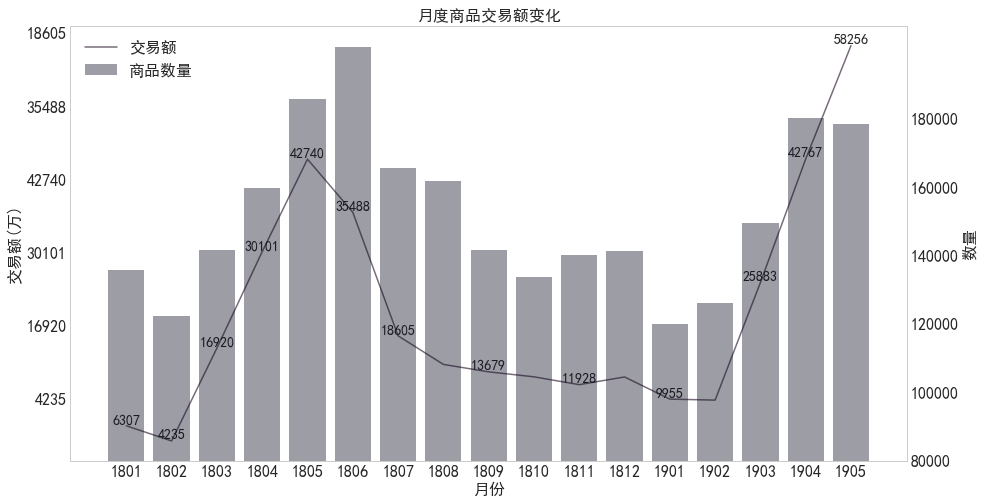

In [144]:
#每月销量变化，绘制双y轴
grdf = df.groupby(by=df.date).sum()/10000
fig, ax = plt.subplots(1,1)
ax.plot(grdf.index,grdf.sales,color=shen_gray)
ax.legend(('交易额',),loc='upper left') #legend传入参数要是元组，所以要加个逗号，
plt.grid()
ax1 = ax.twinx()
ax1.bar(df.groupby(by=df.date).sum().index,df.groupby(by=df.date).item_id.count(),color=shen_black,alpha=0.4)
ax1.grid()
ax1.legend(('商品数量',),loc='upper left',bbox_to_anchor=(0,0.95))
plt.title('月度商品交易额变化')
ax.set_xlabel("月份")
ax.set_ylabel("交易额(万)")
ax1.set_ylabel("数量")
ax.set_yticklabels('%.0f'%i for i in grdf.sales)
ax1.set_yticklabels([80000,100000,120000,140000,160000,180000])
for a,b in zip(grdf.index,grdf.sales):
    if a in ['1808','1810','1812','1902']:
        continue
    else:
        ax.text(a, b, '%.0f' % b, ha='center', va= 'bottom',fontsize=14)
plt.savefig(r'E:\Jupyter Notebook\销售变化.png')

**从上图可以看到，商品标题中带有毕业二字的商品在每年的5月份达到最高点**

In [163]:
#3\4\5销售额同比增长
mgdf = df.groupby(by=df.date).sum()
mgdf.sales.loc[['1903','1904','1905']].sum()/mgdf.sales.loc[['1803','1804','1805']].sum() -1

0.41382777451598507

In [166]:
#3\4\5上架数量商品
cgdf = df.groupby(by=df.date).count()
cgdf.item_id.loc[['1903','1904','1905']].sum()/cgdf.item_id.loc[['1803','1804','1805']].sum() -1

0.08441161590610147

In [220]:
#3\4\5商家数量同比
a = len(df[df.date.str.contains('1903|1904|1905')].store.unique())
b = len(df[df.date.str.contains('1803|1804|1805')].store.unique())
a/b-1

-0.05020702132841581

### 5.3 分布分析

In [123]:
#绘制频率分布直方图，观察各项目类型的分布销售段
ptdf = df.pivot_table(index=['item_id'],values=['sales'],aggfunc='sum')
r = ptdf.sales.max()-ptdf.sales.min() #极差，最大值与最小值的差异
print('极差:',r)
print('商品数量:',len(ptdf.index))

极差: 23948972.99212428
商品数量: 414875


**极差为2395万，所以设定组距为100w，进行绘制频率分布直方图，左闭右开**

In [ ]:
plt.hist(x=ptdf,bins=40) #数据量太大，放弃

### 5.4 贡献度分析
**贡献度分析，20/80法则，找出贡献度达到80%节点最大的商品**

In [19]:
allsales = ptdf.sales.sum()
allsales

3673614193.632689

In [20]:
ptdf.sort_values(by=['sales'],ascending=False)/allsales

,sales
item_id,
521769917292.000,0.007
578930684195.000,0.006
527041478783.000,0.005
19653698393.000,0.005
546286901777.000,0.005
569018618071.000,0.004
547875837548.000,0.003
41965065095.000,0.003
522017646223.000,0.003


### 5.5 相关性分析
**价格与销售额之间的关系**

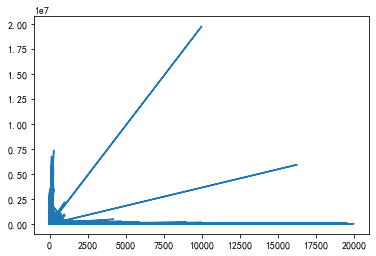

In [36]:
plt.plot(df.price,df.sales)

(array([     0., 349947., 443373.,  58499., 240431.,  62664.,  39771.,
         23094.,   2799.]),
 array([    0,     1,     2,     7,    10,   100,   300,  1000,  6000,
        10000]),
 <a list of 9 Patch objects>)

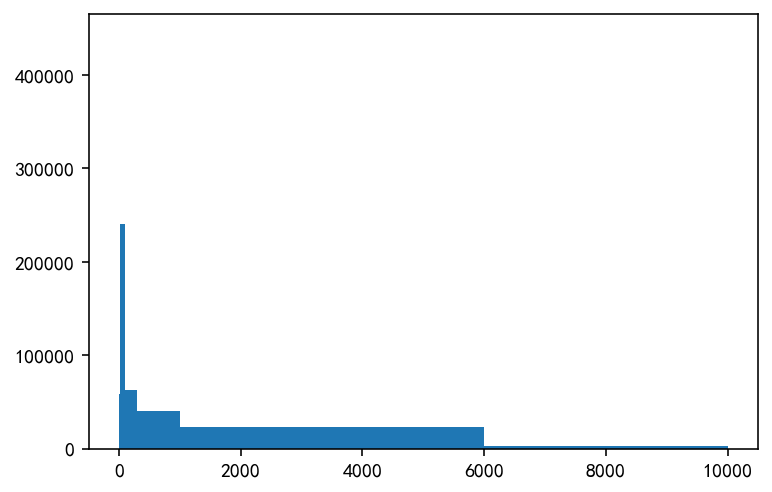

In [115]:
plt.hist(df.sold,bins=[0,1,2,7,10,100,300,1000,6000,10000])

## 六、对标题进行分词

In [119]:
import jieba #导入结巴分词
import collections
tx = ''
for i,v in zip(df.title,df.sold): #按照sold加权词汇，在定量基础上仅作定性分析
    v = int(v)
    if v<=10:
        m = 1
    elif v<100:
        m = 2
    elif v<1000:
        m = 3
    else:
        m = v/1000
    s = jieba.cut(i)
    tx = tx + '/'.join(s)  * int(m)
s = tx.split('/')
res = collections.Counter(s)
pd.DataFrame(dict(res).items(),columns=['词汇','加权频数']).to_excel('加权频数.xlsx')

In [124]:
cidf = pd.read_excel('加权频数.xlsx')
cidf.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
cidf.sort_values(by='加权频数',ascending=False,inplace=True)
cidf.head(10)

,词汇,加权频数
34,毕业,1446631
7,,1306574
422,NaN,423204
90,创意,311985
42,定制,250413
102,小学,240972
208,小,215118
76,服,209053
202,送,196239
88,礼物,192592


In [125]:
cidf.drop(axis=0,index=[7,422],inplace=True)
cidf.head(10)

,词汇,加权频数
34,毕业,1446631
90,创意,311985
42,定制,250413
102,小学,240972
208,小,215118
76,服,209053
202,送,196239
88,礼物,192592
273,学生,190320
615,小学生,163204


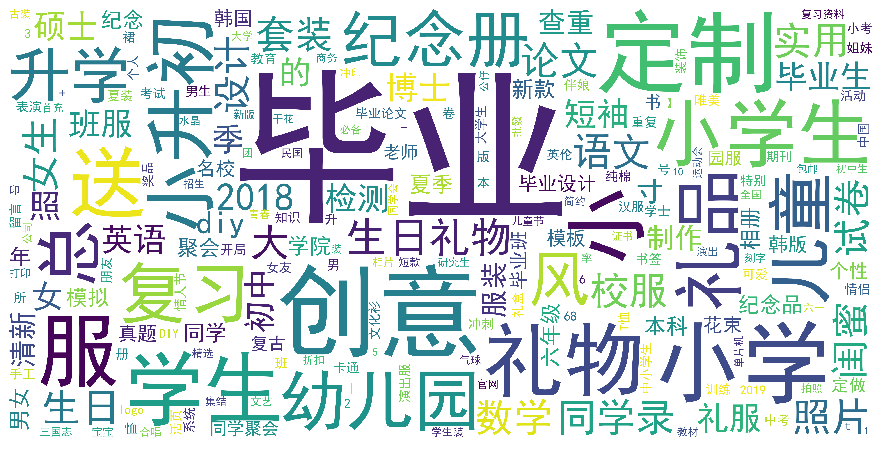

<Figure size 1080x576 with 0 Axes>

In [128]:
from wordcloud import WordCloud
plt.figure(figsize=(20,8))
d = dict(zip(cidf.词汇,cidf.加权频数)) #转换为dict
font = r'C:\Windows\Fonts\simhei.ttf'
wc = WordCloud(font_path=font,  # 如果是中文必须要添加这个，否则会显示成框框
               scale=14,
               background_color='white',
               #width=2000,
               #max_font_size=100, #字体大小
               #mask=alice_coloring
               random_state=1
              ).generate_from_frequencies(d)
plt.imshow(wc)  # 用plt显示图片
plt.axis('off')  # 不显示坐标轴
wc.to_file('词云.png')
plt.show()  #输出图像
plt.savefig('词云.png')

In [257]:
chadf.price.describe()

count   23511.000
mean       40.153
std        74.291
min         0.001
25%         2.200
50%        10.000
75%        30.000
max      2000.000
Name: price, dtype: float64

Text(0, 0.5, '商家数量')

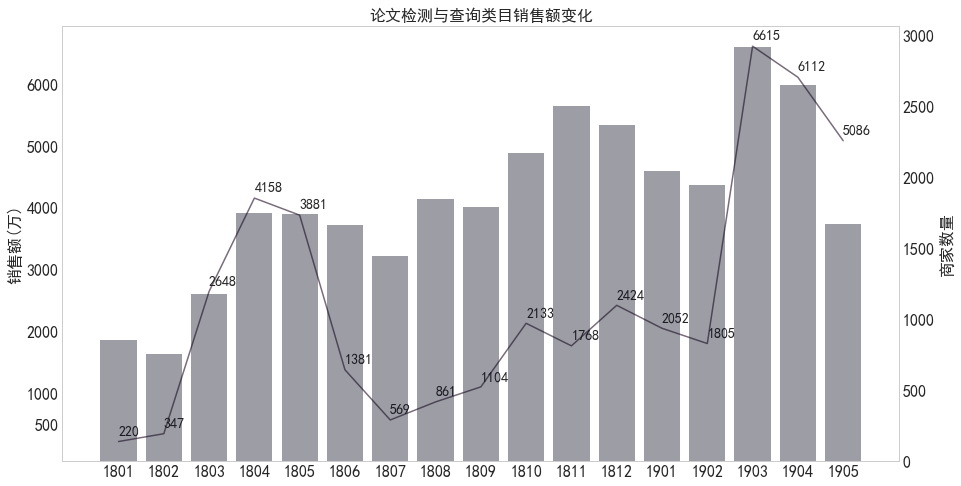

In [168]:
chachongdf = df[df.最小类目.str.contains('论文检测与查询')].pivot_table(index=['date'],values=['sales'],aggfunc=np.sum)
chachongstore = df[df.最小类目.str.contains('论文检测与查询')].pivot_table(index=['date'],values=['store'],aggfunc='count')
fig = plt.figure()
ax = plt.subplot(111)
plt.plot(chachongdf.index,chachongdf.sales/10000,color=shen_gray)
plt.title('论文检测与查询类目销售额变化')
plt.ylabel('销售额(万)')
plt.yticks([500,1000,2000,3000,4000,5000,6000])
for a,b in zip(chachongdf.index,chachongdf.sales/10000):
    plt.text(a,b+100,round(b),fontsize=14,)
ax.grid()

ax1 = ax.twinx()
ax1.bar(x=chachongstore.index,height=chachongstore.store,color=shen_black,alpha=0.4)
ax1.grid()
ax1.set_ylabel("商家数量")

**2018-2019共有多少商家提供论文监测服务**

In [181]:
len(df[df.最小类目.str.contains('论文检测与查询')]['store'].unique()) 

2829

**2019 1-5月同比增速**

In [187]:
chachongdf.iloc[-5:].sum()/chachongdf.iloc[:5].sum()-1

sales   0.925
dtype: float64

In [145]:
chachongdf.iloc[:12].sum()

sales   214946750.851
dtype: float64

**代写代做**

In [222]:
daidf = df[df.title.str.contains('代做|代写')].sort_values(['sales'],ascending=False)
daidf.head()

,date,loc,title,brand_id,cat_id,item_id,price,sold,store,sales,cat,一级类目,最小类目
998365,1903,天津,函授电大专科本科硕士MBA毕业/原创代写软文写手/议论职称检测,NaN,50015123.000,586652689929.000,1000.000,2181.000,t_1512962688911_0261,2181000.000,"[教育培训, 教学服务, 文章写作]",教育培训,文章写作
204917,1804,北京,matlab代做计算机asp.net软件java安卓c++jsp工程IOS毕业生c#设计,NaN,50014911.000,566896429779.000,100.000,9682.000,shatuxiong,968200.000,"[网店/网络服务/软件, 开发/建站服务, 开发]",网店/网络服务/软件,开发
153295,1803,辽宁 沈阳,计算机JSP安卓ASP.NET毕业生系统HTML5设计PHP毕设网站IOS代做APP,NaN,50014911.000,537479409278.000,50.000,15527.000,皮皮鲁的风范,776350.000,"[网店/网络服务/软件, 开发/建站服务, 开发]",网店/网络服务/软件,开发
129468,1803,北京,专业诗歌代做护理查房年会定制毕业论文答辩ppt课件诗词写手投稿,NaN,50025054.000,564207714496.000,10.000,76940.000,土波利旗舰店,769400.000,"[个性定制/设计服务/DIY, 设计服务, 诗词定制]",个性定制/设计服务/DIY,诗词定制
940110,1902,北京,计算机专业JSP安卓ASP.NET毕业生网站JAVA设计PHP程序MATLAB代做,NaN,50014911.000,573566924683.000,50.000,12796.000,无忧帮帮,639800.000,"[网店/网络服务/软件, 开发/建站服务, 开发]",网店/网络服务/软件,开发


In [230]:
daidf.head(10)[['title','sold']].reset_index(drop=True)

,title,sold
0,函授电大专科本科硕士MBA毕业/原创代写软文写手/议论职称检测,2181.000
1,matlab代做计算机asp.net软件java安卓c++jsp工程IOS毕业生c#设计,9682.000
2,计算机JSP安卓ASP.NET毕业生系统HTML5设计PHP毕设网站IOS代做APP,15527.000
3,专业诗歌代做护理查房年会定制毕业论文答辩ppt课件诗词写手投稿,76940.000
4,计算机专业JSP安卓ASP.NET毕业生网站JAVA设计PHP程序MATLAB代做,12796.000
5,计算机JSP安卓ASP.NET毕业生程序matlab设计PHP毕设网站java代做,11207.000
6,专业ppt制作设计美化毕业答辩素材商务幻灯片代做课件动画定制,53229.000
7,计算机JSP安卓ios毕业生网站maltab设计PHP毕设游戏java代做c++,10444.000
8,计算机JSP安卓ASP.NET毕业生程序JAVA设计PHP毕设网站MATLAB代做,10114.000
9,ppt制作代做专业PPT设计毕业答辩ppt定制动画课件幻灯片修改美化,50065.000


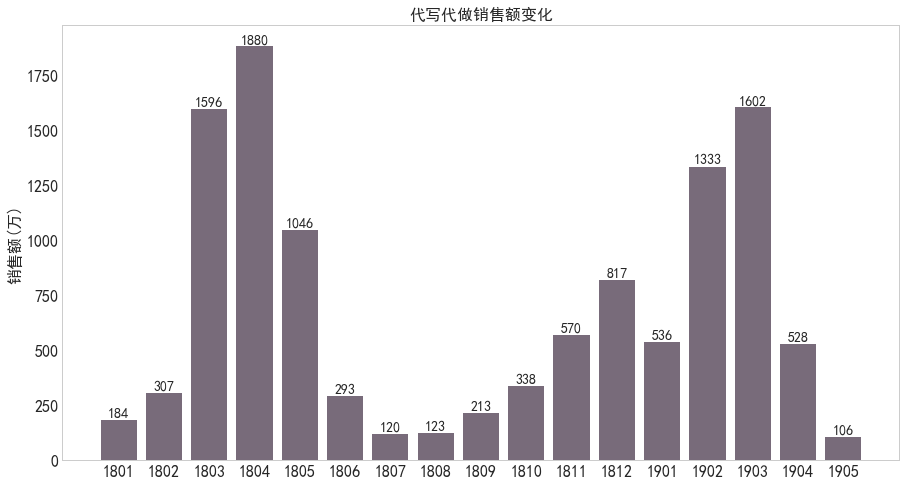

In [241]:
daidfs = daidf.pivot_table(index=['date'],values=['sales'],aggfunc=np.sum)
plt.figure()
plt.bar(daidfs.index,daidfs.sales/10000,color=shen_gray)
plt.title('代写代做销售额变化')
plt.ylabel('销售额(万)')
#plt.yticks([500,1000,2000,3000,4000,5000,6000])
for a,b in zip(daidfs.index,daidfs.sales/10000):
    plt.text(a,b+14,round(b),ha='center',fontsize=14)
plt.grid()

### 各类目销售占比

In [170]:
len(df.一级类目.unique())

119

In [335]:
am = df.pivot_table(index='一级类目',values=['sales'],aggfunc=np.sum).sort_values('sales',ascending=False)
am['占比'] = (am.sales/am.sales.sum()).apply(lambda x: format(x, '.1%')) 
am.head(10)

,sales,占比
一级类目,,
个性定制/设计服务/DIY,963327338,26.2%
教育培训,517817606,14.1%
节庆用品/礼品,465338777,12.7%
女装/女士精品,458751105,12.5%
童装/婴儿装/亲子装,450064747,12.3%
文具电教/文化用品/商务用品,167026089,4.5%
书籍/杂志/报纸,94338192,2.6%
家居饰品,72466358,2.0%
网游装备/游戏币/帐号/代练,69441075,1.9%


In [378]:
df.一级类目.fillna('无',inplace=True)
df[df.一级类目.str.contains('童装/婴儿装/亲子装')].sort_values('sales',ascending=False).head()[['title','sales','一级类目','最小类目']]

,title,sales,一级类目,最小类目
1180528,班服运动会毕业服小学生校服幼儿园园服夏装男女童装夏季定制套装,1944964,童装/婴儿装/亲子装,校服/校服定制
309888,幼儿园园服夏装夏季套装小学生校服儿童英伦风纯棉班服毕业照服装,1760188,童装/婴儿装/亲子装,校服/校服定制
205791,幼儿园园服夏装夏季套装小学生校服夏天儿童纯棉短袖六一毕业班服,1561148,童装/婴儿装/亲子装,校服/校服定制
316076,幼儿园园服儿童装夏季班服小学生短袖校服装英伦风毕业照套装夏天,1551544,童装/婴儿装/亲子装,校服/校服定制
339115,幼儿园园服夏季装儿童班服合唱服学院风韩版毕业服小学生校服套装,1484664,童装/婴儿装/亲子装,校服/校服定制


### 毕业赠品

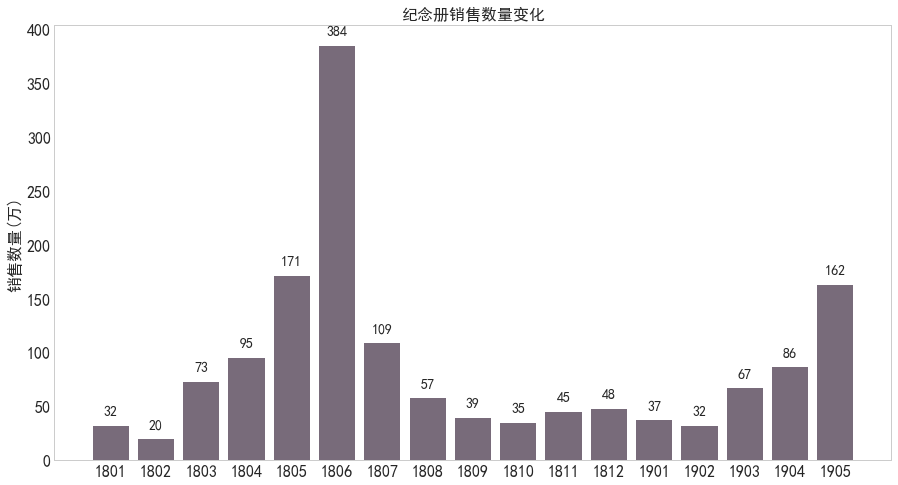

In [245]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
zengdf = df[df.title.str.contains('纪念册|照片书')].sort_values(['sales'],ascending=False)
zengdfs = zengdf.pivot_table(index=['date'],values=['sold'],aggfunc=np.sum)
plt.figure()
plt.bar(zengdfs.index,zengdfs.sold/10000,color=shen_gray)
plt.title('纪念册销售数量变化')
plt.ylabel('销售数量(万)')
#plt.yticks([500,1000,2000,3000,4000,5000,6000])
for a,b in zip(zengdfs.index,zengdfs.sold/10000):
    plt.text(a,b+10,round(b),ha='center',fontsize=14)
plt.grid()

# 从哪几个方面去写？
1. 毕业那段时间各销售产品的涨跌，参考文章http://www.199it.com/archives/768630.html
http://edu.zjol.com.cn/jyjsb/zh/201806/t20180626_7624880.shtml
参考图片
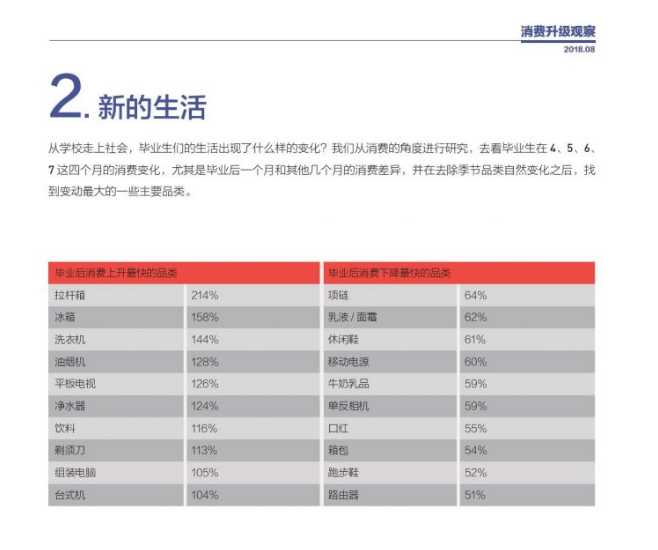
2. 毕业之前的毕业设计
3. 毕业之前的毕业赠品，大家毕业前都喜欢送什么赠品？
